In [39]:
import requests
import bs4
import pandas as pd
from tqdm import tqdm
import time
from urllib.request import urlopen
from urllib.request import Request
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/Ji Hoon/Desktop/서울시 착한가격음식점(종합).csv", encoding="cp949")

In [4]:
df_no=df[df["별점"]!='-']
len(df_no["별점"])

538

In [11]:
df_no.reset_index(inplace=True)

In [12]:
맛 = []
친절 = []
가성비 = []
양 = []
혼밥 = []
청결 = []
인테리어 = []
특별한날 = []
특별한메뉴 = []
단체모임 = []
for i in range(len(df_no["별점"])):
    맛.append(int(df_no["리뷰"][i].split(",")[0].split("[")[1].strip("''")))
    친절.append(int(df_no["리뷰"][i].split(",")[1].strip().strip("''")))
    가성비.append(int(df_no["리뷰"][i].split(",")[2].strip().strip("''")))
    양.append(int(df_no["리뷰"][i].split(",")[3].strip().strip("''")))
    혼밥.append(int(df_no["리뷰"][i].split(",")[4].strip().strip("''")))
    청결.append(int(df_no["리뷰"][i].split(",")[5].strip().strip("''")))
    인테리어.append(int(df_no["리뷰"][i].split(",")[6].strip().strip("''")))
    특별한날.append(int(df_no["리뷰"][i].split(",")[7].strip().strip("''")))
    특별한메뉴.append(int(df_no["리뷰"][i].split(",")[8].strip().strip("''")))
    단체모임.append(int(df_no["리뷰"][i].split(",")[9].split("]")[0].strip().strip("''")))

In [35]:
table = pd.DataFrame({"업소명":df_no["업소명"],"별점":df_no["별점"],"맛":맛,"친절":친절,"가성비":가성비,"양":양,"혼밥":혼밥,"청결":청결,"인테리어":인테리어,"특별한날":특별한날,"특별한메뉴":특별한메뉴,"단체모임":단체모임})

In [36]:
for i in table["단체모임"]:
    i = float(i)
    

,업소명,별점,맛,친절,가성비,양,혼밥,청결,인테리어,특별한날,특별한메뉴,단체모임
0,목우촌부추삼겹살,4.36,47,12,21,8,0,1,0,1,4,6
1,오백냥분식,4.42,26,16,32,10,25,4,3,1,0,1
2,토방 닭 한마리,4.52,83,32,24,24,5,4,1,0,5,5
3,왕세숫대야냉면(행복을파는집),4.44,732,141,654,381,283,39,14,3,53,2
4,돌마리유황오리,4.41,57,16,12,5,0,1,0,3,21,7
...,...,...,...,...,...,...,...,...,...,...,...,...
533,삼겹살데이,4.35,60,25,33,14,0,2,1,0,4,6
534,홍능갈비,4.41,6,2,1,1,1,0,1,0,1,0
535,보물쌈,4.08,71,21,37,25,11,3,2,1,7,2
536,가정식당,4.13,18,11,13,5,5,2,1,1,0,0


In [42]:
small_table = pd.DataFrame({"업소명":df_no["업소명"],"별점":df_no["별점"],"맛":맛,})

In [67]:
table = table.astype({"별점":"float"})

In [69]:
table["별점"]=table["별점"]*100

C:\Users\Ji Hoon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='별점', ylabel='Density'>

C:\Users\Ji Hoon\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ji Hoon\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


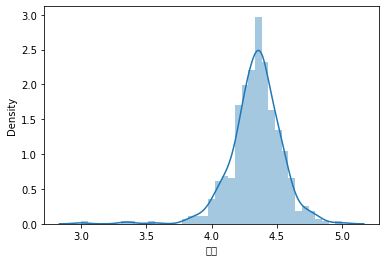

In [76]:
table.corr()

,별점,맛,친절,가성비,양,혼밥,청결,인테리어,특별한날,특별한메뉴,단체모임
별점,1.000000,0.080630,0.137027,0.067510,0.102102,0.040318,0.149357,0.160875,0.127160,0.154716,0.105012
맛,0.080630,1.000000,0.512195,0.775530,0.843844,0.776503,0.576481,0.357968,0.324761,0.561176,0.149228
친절,0.137027,0.512195,1.000000,0.427129,0.482914,0.428174,0.861680,0.631945,0.814118,0.796533,0.886349
가성비,0.067510,0.775530,0.427129,1.000000,0.872365,0.827214,0.403822,0.243678,0.158124,0.319976,0.128810
양,0.102102,0.843844,0.482914,0.872365,1.000000,0.777996,0.480171,0.288318,0.246103,0.460469,0.191491
혼밥,0.040318,0.776503,0.428174,0.827214,0.777996,1.000000,0.478732,0.226936,0.158257,0.392180,0.110286
청결,0.149357,0.576481,0.861680,0.403822,0.480171,0.478732,1.000000,0.728807,0.744138,0.766392,0.691716
인테리어,0.160875,0.357968,0.631945,0.243678,0.288318,0.226936,0.728807,1.000000,0.769753,0.684153,0.543972
특별한날,0.127160,0.324761,0.814118,0.158124,0.246103,0.158257,0.744138,0.769753,1.000000,0.801814,0.827336
특별한메뉴,0.154716,0.561176,0.796533,0.319976,0.460469,0.392180,0.766392,0.684153,0.801814,1.000000,0.679160
